<h1>CONTRIBUTORY RISK FACTORS TO HEART DISEASES IN AMERICA</h1>

   <h4><p>About 610,000 people die of heart disease in the United States every year–that’s 1 in every 4 deaths. Heart disease is the leading cause of death for both men and women. More than half of the deaths due to heart disease in 2009 were in men. Coronary Heart Disease(CHD) is the most common type of heart disease, killing over 370,000 people annually. Every year about 735,000 Americans have a heart attack. Of these, 525,000 are a first heart attack and 210,000 happen in people who have already had a heart attack.This makes heart disease a major concern to be dealt with. But it is difficult to identify heart disease because of several contributory risk factors such as diabetes, high blood pressure, high cholesterol, abnormal pulse rate, and many other factors. Due to such constraints, scientists have turned towards modern approaches like Data Mining and Machine Learning for predicting the disease.Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States. One person dies every 36 seconds in the United States from cardiovascular disease. Machine learning (ML) proves to be effective in assisting in making decisions and predictions from the large quantity of data produced by the healthcare industry.</p></h4>

<h1>Data Set</h1>

<p>The dataset consists of 303 individuals data. There are 14 columns in the dataset, which are described below.<br>
Age: displays the age of the individual.<br>
Sex: displays the gender of the individual using the following format :<br>
1 = male<br>
0 = female<br>
Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :<br>
1 = typical angina<br>
2 = atypical angina<br>
3 = non — anginal pain<br>
4 = asymptotic<br>
Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit)<br>
Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)<br>
Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.<br>
If fasting blood sugar > 120mg/dl then : 1 (true)<br>
else : 0 (false)<br>
Resting ECG : displays resting electrocardiographic results<br>
0 = normal<br>
1 = having ST-T wave abnormality<br>
2 = left ventricular hyperthrophy<br>
Max heart rate achieved : displays the max heart rate achieved by an individual.<br>
Exercise induced angina :<br>
1 = yes<br>
0 = no<br>
ST depression induced by exercise relative to rest: displays the value which is an integer or float.<br>
Peak exercise ST segment :<br>
1 = upsloping<br>
2 = flat<br>
3 = downsloping<br>
Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.<br>
Thal : displays the thalassemia :<br>
3 = normal<br>
6 = fixed defect<br>
7 = reversible defect<br>
Diagnosis of heart disease : Displays whether the individual is suffering from heart disease or not :<br>
0 = absence<br>
1, 2, 3, 4 = present.</p>

<h1>Data Analysis</h1>

Let's look at the following questions probably running in my mind;<br>
Q1 - i.     what are the basics of this data set?,<br>
      ii.   Are there missing values?,<br>
      iii.  what does the five number summary look like?<br>
Q2 - What's the age of people suffering from the diseases or not?<br>
Q3 - What is the correlation between this datas?<br>
Q4 - What age and gender suffers more from this disease?<br>
Q5 - Wha are the contributing risk factors?<br>
Q6 - What Machine Learning algorithm gives the best results


In [54]:
#import libaries
#for basic operations:
import pandas as pd
import numpy as np
#for data visualisations;
import matplotlib.pyplot as plt
import seaborn as sns
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category = FutureWarning)



<h1>Q1</h1><br> <h2>i. What are the basics of this data set?<br> ii. Are there missing values?<br> iii. What does the five number summary look like?<br></h2>


In [55]:
#i. what are the basics of this data set?
Hd = pd.read_csv("heart.csv")
Hd.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [56]:
Hd.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [57]:
#The data shape shows there are 303 attributes and 14 features
Hd.shape

(303, 14)

In [58]:
#I took a look at the types of data present in the data set
Hd.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [59]:
#select numeric columns
Hd_numeric = Hd.select_dtypes(include=[np.number])
numeric_cols = Hd_numeric.columns.values
numeric_cols

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

In [60]:
#select non numeric columns
Hd_non_numeric = Hd.select_dtypes(exclude=[np.number])
non_numeric_cols = Hd_non_numeric.columns.values
non_numeric_cols

array([], dtype=object)

In [61]:
#ii. Are there missing value?
Hd.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The above shows that theres no missing value but we would use two methods to confirm one of which includes the 5 number summary, fun right?

In [62]:
#method 1
Hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above we would observe that the total number of entries are 303 ranging from 0-302, and all columns have 303 non null count meaning no missing values present in this data set, this takes us to my iii. What does the 5 number summary looks like and we would this question to confirm if truly there are no missing values, Let's ride!

In [63]:
#Five number summary
Hd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the above I noticed that the count corresponds with the info we went through before and also with the initial result gotten from .isnull<br>
Also the Mean and standard deviation same as the median which is the middle number, mode; the most occurring number(max) and less occurring number(min), the 25th percentile, 50th percentile and 75th percentile of each columns can be seen above. The count shows the total number of entries in each column. 

<h1>Q2</h1><br> <h2>What's the age of people suffering from the diseases or not?</h2>

In [64]:
Hd.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'target']

### 1 = male, 0 = female
Hd['target'] = Hd.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
Hd['sex'] = Hd.sex.map({0: 'female', 1: 'male'})
Hd['thal'] = Hd.thal.fillna(Hd.thal.mean())
Hd['ca'] = Hd.ca.fillna(Hd.ca.mean())

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

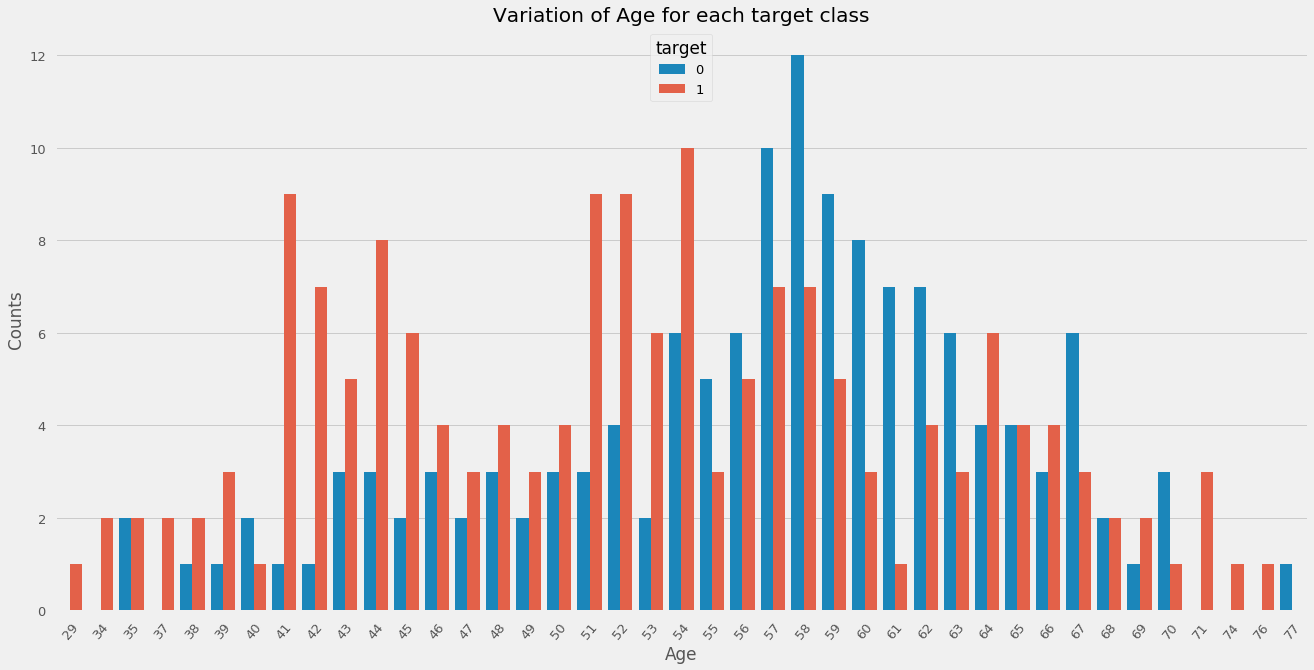

In [65]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(Hd['age'],hue=Hd['target'],ax=ax)
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Variation of Age for each target class')
plt.xticks(rotation=50)


The age of people suffering from this diease; We can see that the oldest male is 54 years old and the oldest female is 58, but that's not the point here, the point we are potraying with this graph is that most people who are suffering are of the age of 58, followed by 57. Maj0rly the age group subsceptible to heart disease are ranged between 51 years - 67 years of age<br> Those from age 29years - 40 years of age are at low risk level while Men at age 41 years - 45 years of age have chances of getting a heart disease while an unstead flow is noticed from age 41years.  

<h1>Q3</h1> 
<h2>What is the correlation between this datas?</h2><br>

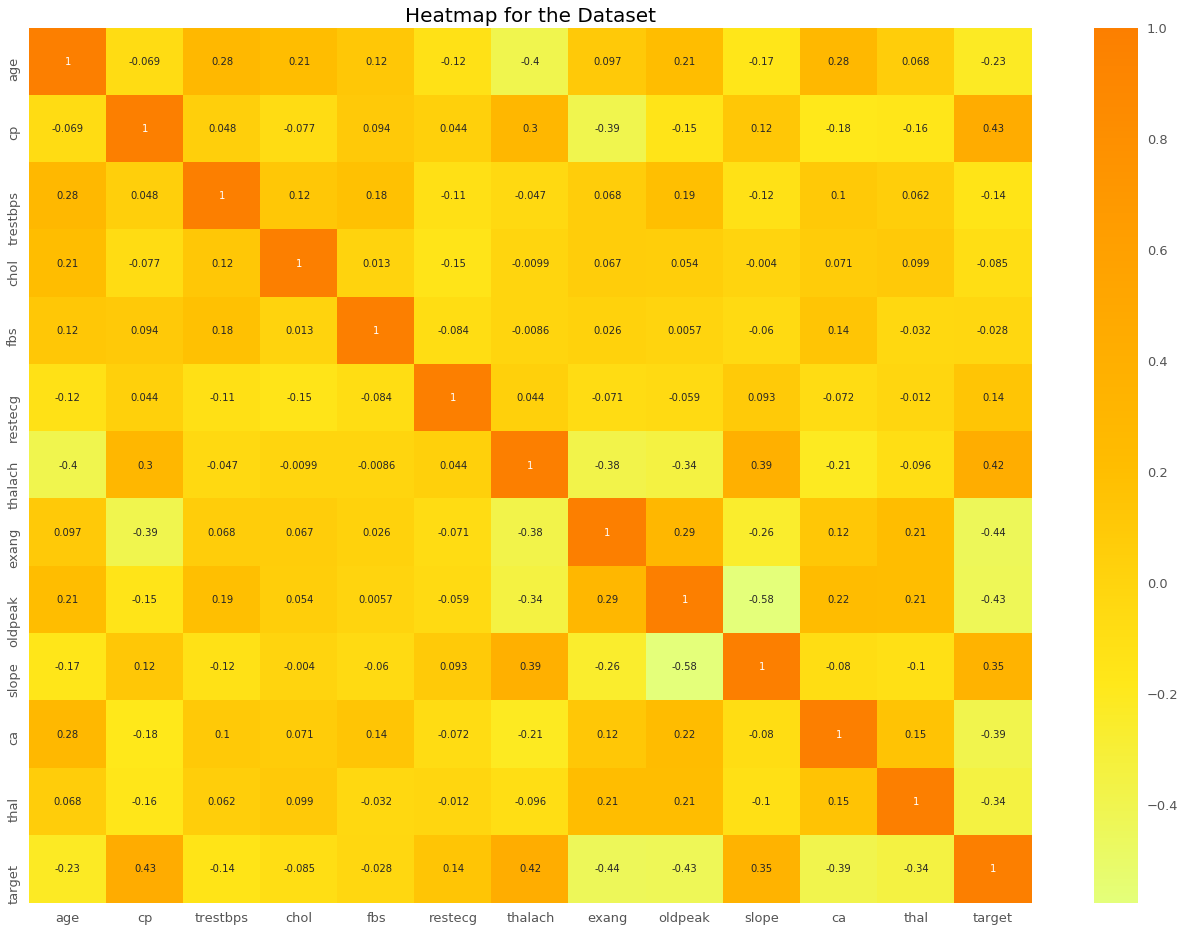

In [66]:
# making a heat map

plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(Hd.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

The Correlation heat map shows the correlations amongst the different attributes of the given dataset. The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

<h1>Q4</h1><br> What age and gender suffers more from this disease?<br>


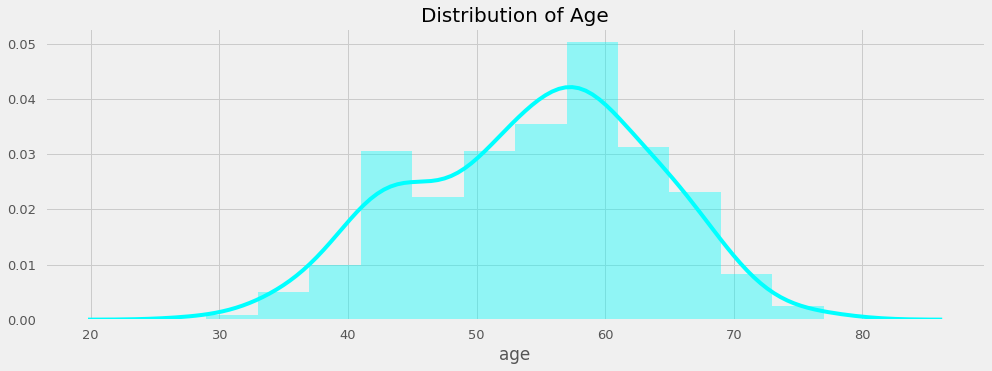

In [67]:
# checking the distribution of age amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(Hd['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. Setting the avaerage at 0.035, the Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart disease, while thos in the category 31-41 likely to suffer from a heart disease.<br> As we know that the number of people in the age group 66-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

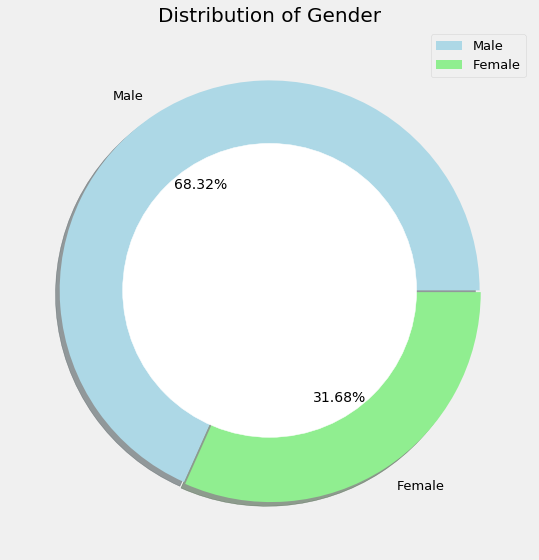

In [68]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = Hd['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

Looking at the Above chart which is a pie chart it is seen that 31.68% multiplied by 2 gives 63.36% and the percentage of the male gender is 68.32%.<br> By looking at the plot, we can assume that Males are two times more likely to suffer from heart diseases in comparison to females.
According to studie, it was discovered that From all the Entries in our dataset 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups.

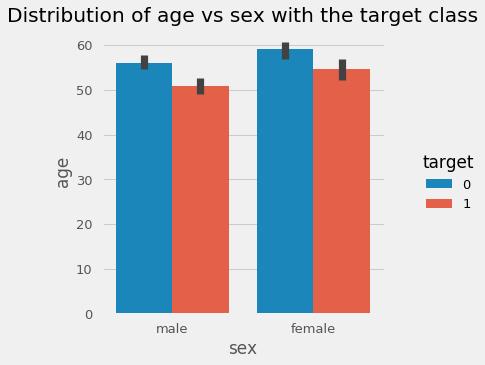

In [69]:
# barplot of age vs sex with hue = target
sns.catplot(kind = 'bar', data = Hd, y = 'age', x = 'sex', hue = 'target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

Hd['sex'] = Hd.sex.map({'female': 0, 'male': 1})
plt.show()

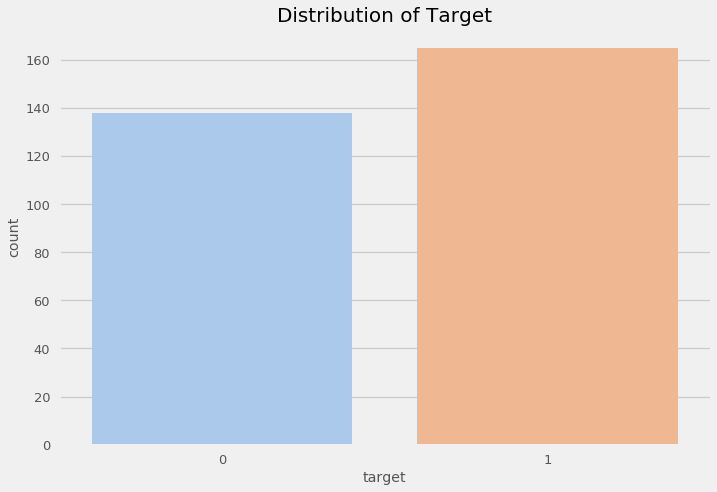

In [70]:
# plotting the target attribute

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(Hd['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

Let's look at the Target, The dataset is quite balanced with almost equal no. of Positive and Negative Classes. Let's say the Positive Class says that the patient is suffering from the disease and the Negative class says that the patient is not suffering from the disease, We also see from the first graph that females who are suffering from the disease are older than males.


<h1>Q5</h1><br> - Wha are the contributing risk factors?<br>


So the target was placed  at 0 and 1; 0 as Positive and 1 as Negative, and in some cases 0 as Negative i.e patients not suffering from the disease and 1 as Positive i.e patients suffering from the disease

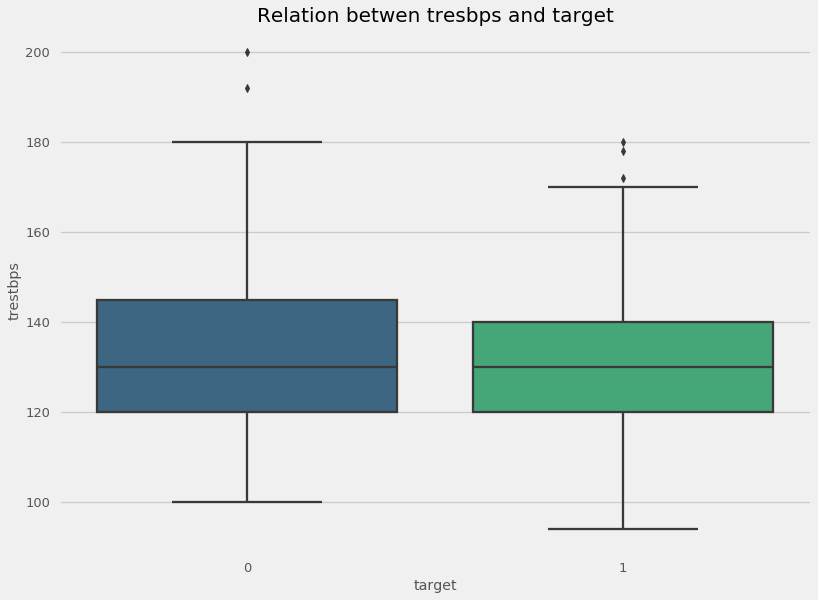

In [71]:
# tresbps vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(Hd['target'], Hd['trestbps'], palette = 'viridis')
plt.title('Relation betwen tresbps and target', fontsize = 20)
plt.show()

tresbps: Resting Blood Pressure, The above Bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases. This is to say that tresbps i.e Resting Blood Pressure is a Contributing Risk Factor to heart disease.

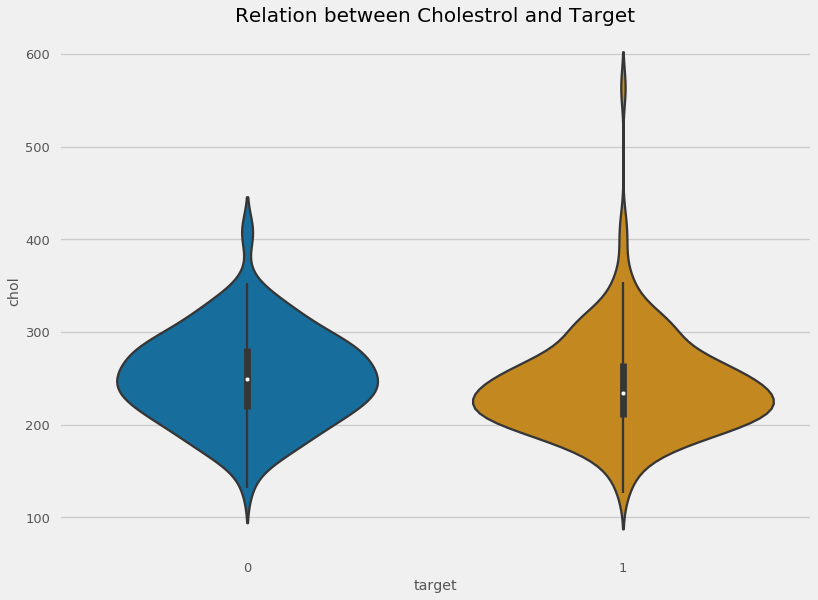

In [72]:
# cholestrol vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(Hd['target'], Hd['chol'], palette = 'colorblind')
plt.title('Relation between Cholestrol and Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases. This further implies that the cholestrol levels plays an important role in determining heart diseases. Hence chol i.e Cholesterol is a Contributing Risk Factor to heart diseases.

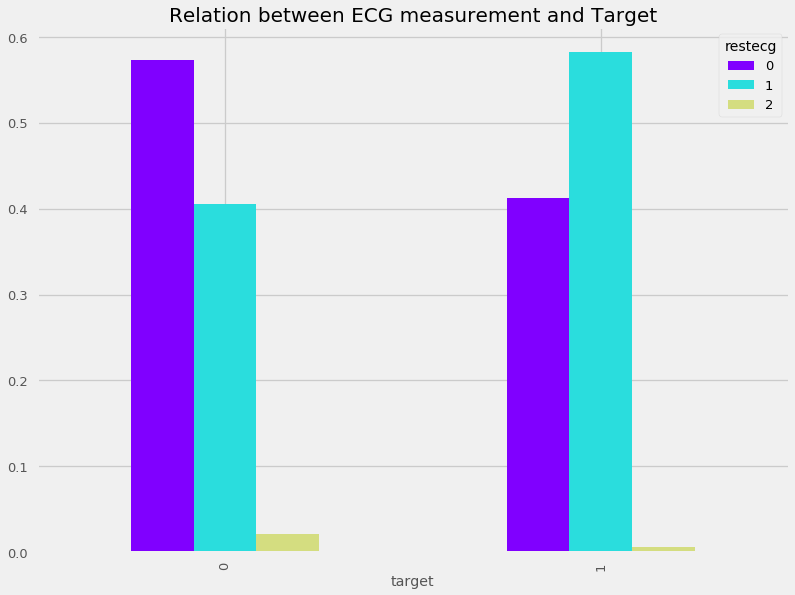

In [73]:
# Resting electrocardiographic measurement vs target
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(Hd['target'], Hd['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation between ECG measurement and Target', fontsize = 20, fontweight = 30)
plt.show()

The electrocardiogram can measure the rate and rhythm of the heartbeat, as well as provide indirect evidence of blood flow to the heart muscle. A standardized system has been developed for the electrode placement for a routine ECG. Ten electrodes are needed to produce 12 electrical views of the heart.<br>This is a column bar chart representing target vs ECG Measurements(Electrocardiogram measurement), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.<br> The Heat Map shows the difference between Target and Maximum Heart Rate shows that the patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.<br>This implies it is very important to keep our heart rates low, to keep ourselves healthy and safe from any dangerous heart diseases.

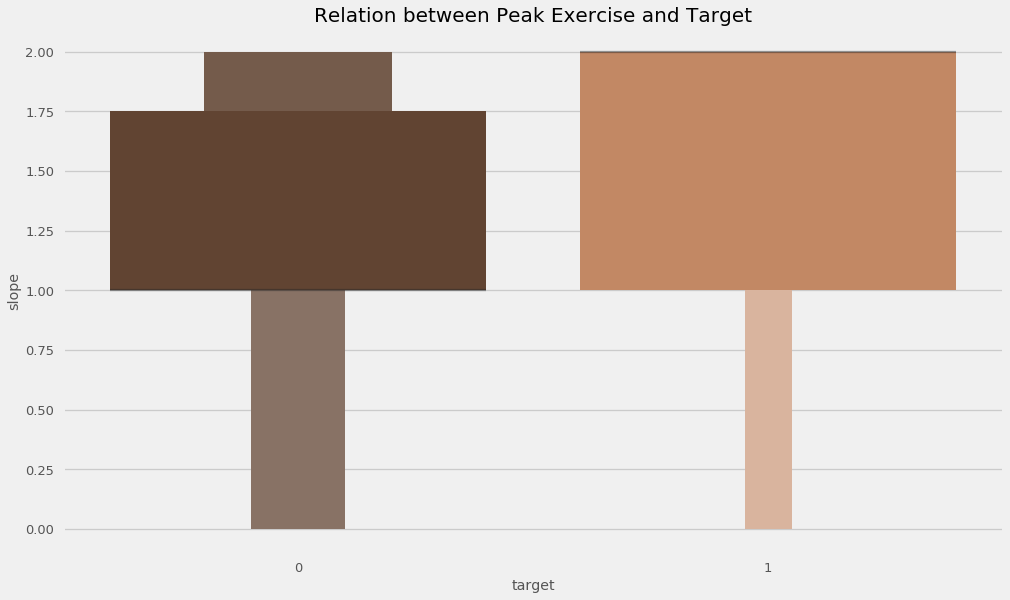

In [74]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(Hd['target'], Hd['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()


Slope : 0 refers to upsloping, 1 refers to flat Exercises pattern.<br>Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

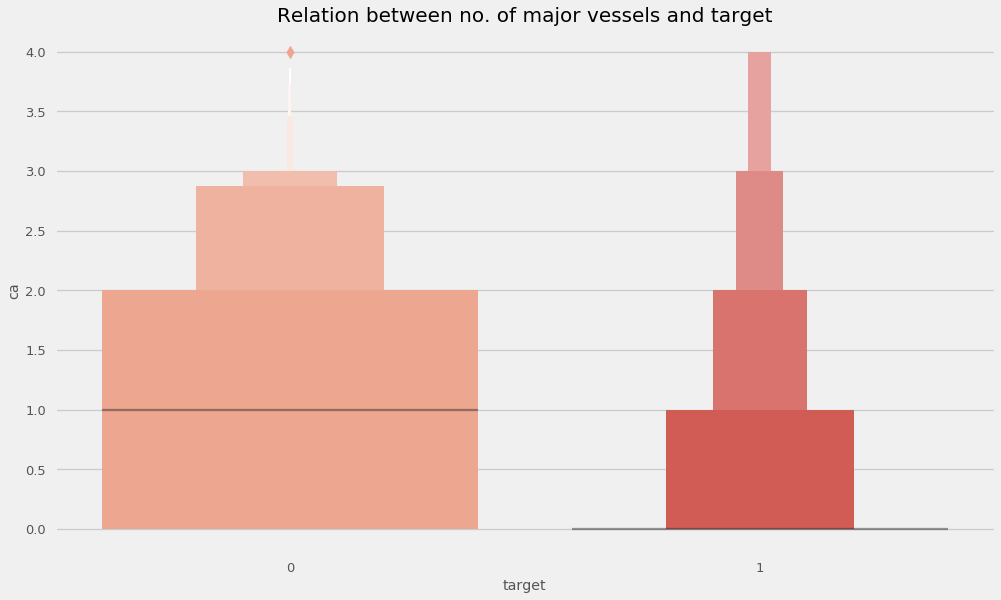

In [75]:
#ca: The number of major vessels (0-3)

sns.boxenplot(Hd['target'], Hd['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

The Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.

Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases. So we can say that Major vessel(ca) is a contributing risk factor to heart disease

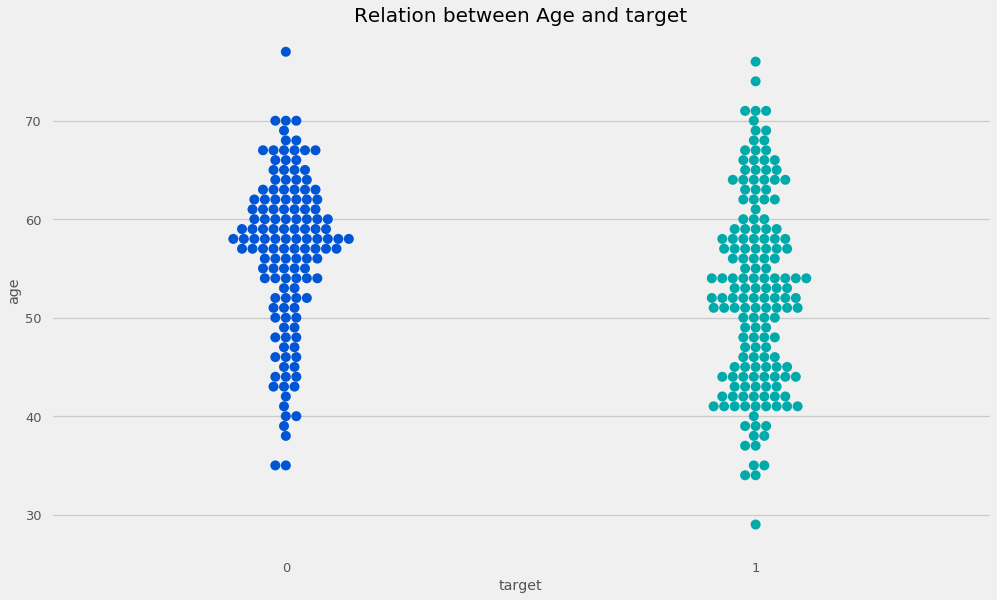

In [76]:
# relation between age and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(Hd['target'], Hd['age'], palette = 'winter', size = 10)
plt.title('Relation between Age and target', fontsize = 20, fontweight = 30)
plt.show()


From the above Swarm plot between the target and the age of the patients, we are not able to find any clue or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

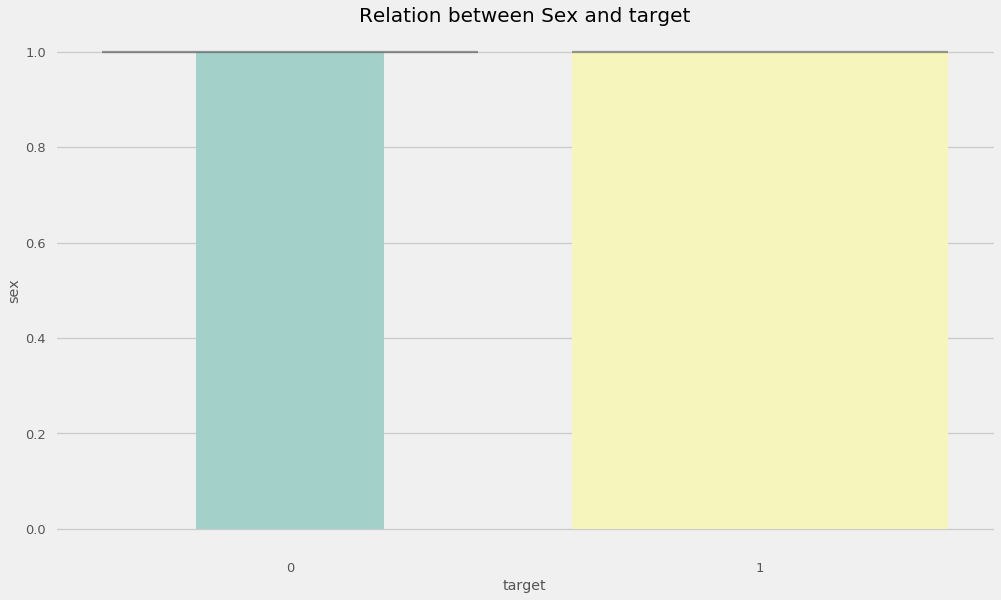

In [77]:
# relation between sex and target

sns.boxenplot(Hd['target'], Hd['sex'], palette = 'Set3')
plt.title('Relation between Sex and target', fontsize = 20, fontweight = 30)
plt.show()

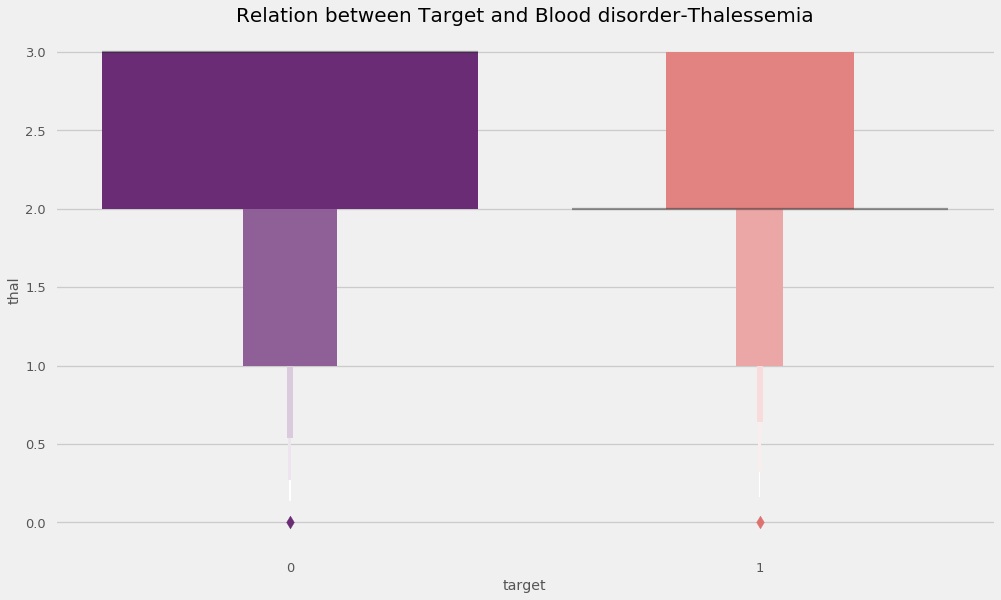

In [78]:
# checking the relation between 
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

sns.boxenplot(Hd['target'], Hd['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

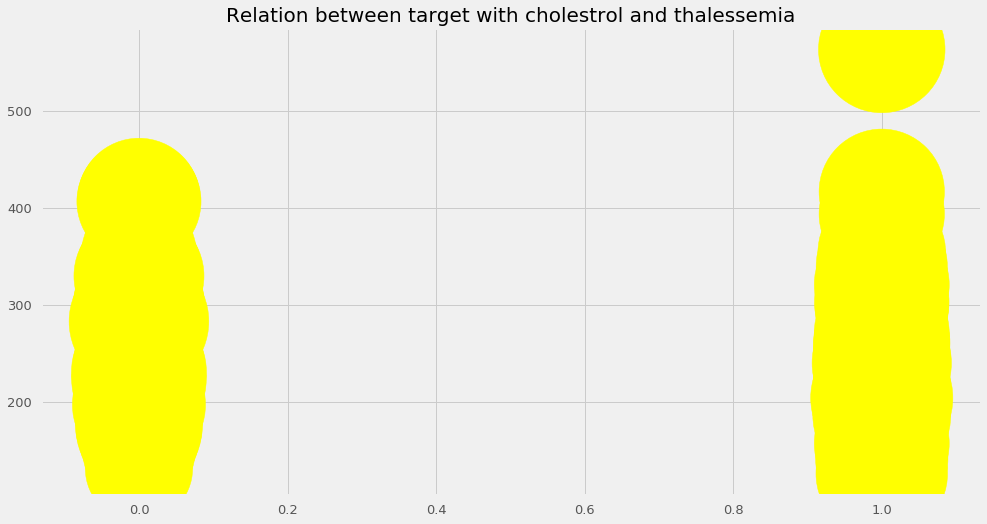

In [79]:
# target vs chol and hue = thalach

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
plt.scatter(x = Hd['target'], y = Hd['chol'], s = Hd['thalach']*100, color = 'yellow')
plt.title('Relation between target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.show()

This look dicey as cholesterol and thalessemia seem to be at the same level

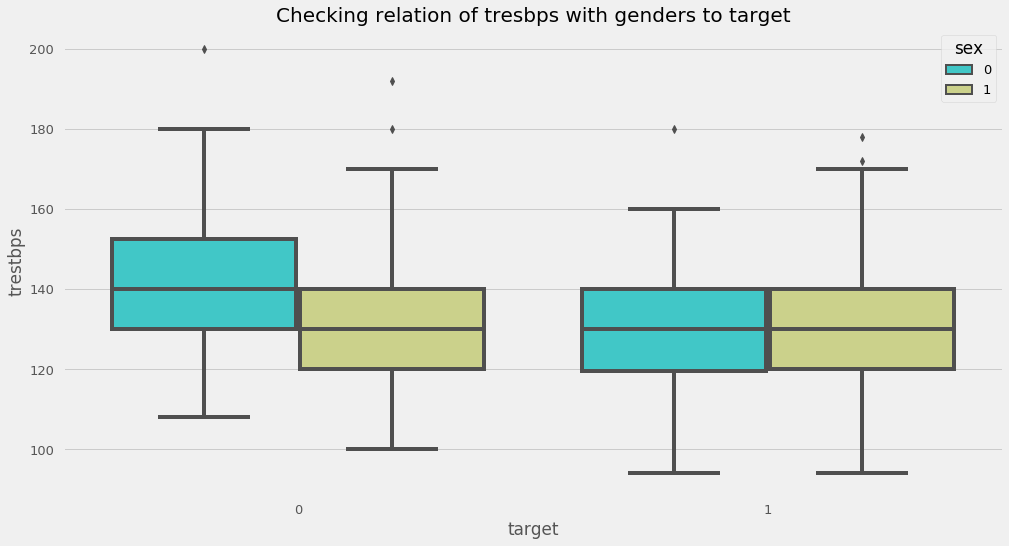

In [80]:
# multi-variate analysis

sns.boxplot(x = Hd['target'], y = Hd['trestbps'], hue = Hd['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

In the above Box plot between Target and tresbps(Resting Blood Pressure) with Gender, shows that Women have higher tresbps than men in case of not suffering from any heart diseases, whereas men and women have almost equal tresbps in case of suffering from a heart diseases. Also, In case of suffering from heart diseases, patients have a slightly lower tresbps in comparison to the patients who are not suffering from heart diseases.

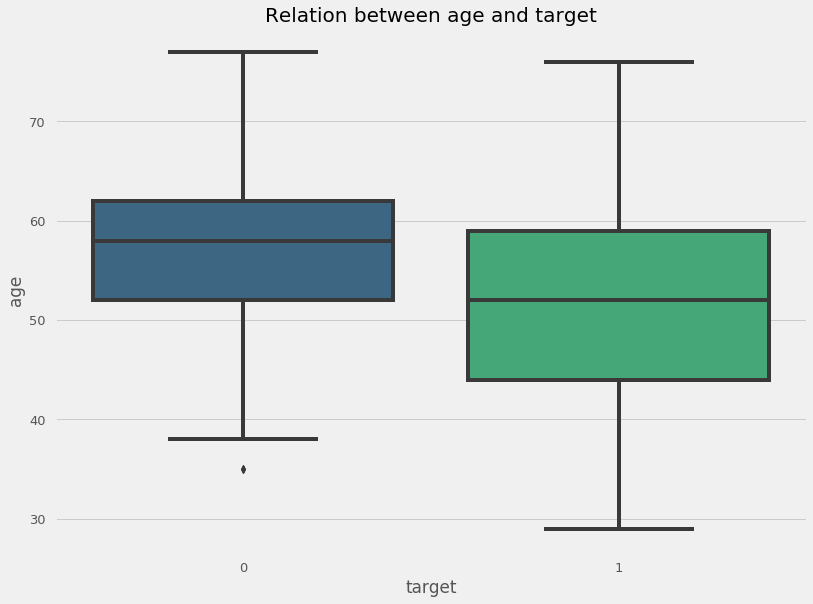

In [81]:
# tresbps vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(Hd['target'], Hd['age'], palette = 'viridis')
plt.title('Relation between age and target', fontsize = 20)
plt.show()

With 0 as positive and 1 as negative, we can see that Age is contributing risk factor to heart diseases. This study can be taken as one of many fact to back this argument.



<h1>Q6</h1><br> <h2>What Machine Learning algorithm gives the best results?</h2><br>i. Feature Engineering<br> ii. Spliting the DataSet.<br> iii. Modelling

We will be using the following Machine learning algorithms;<br>
 1. Random Forest Classifier
 2. SVM
 3. Naive Bayes
 4. Logistic Regression
 5. Decision Tree

<h2>Confusion Matrix</h2><br><p>The confusion matrix displays the correctly predicted as well as incorrectly predicted values by a classifier.
The sum of TP and TN, from the confusion matrix, is the number of correctly classified entries by the classifier.<br>This will be used throughout our modelling.

<h2>1. Random Forest</h2><br><p>Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result (source; Tutorialspoint)

In [82]:
#1i and ii i.e feature engineering and data splitting for Random forest
X = Hd.iloc[:, :-1].values
y = Hd.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [83]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


In [85]:
cm_test

array([[23,  7],
       [ 4, 27]], dtype=int64)

In [86]:
cm_train

array([[110,   3],
       [  1, 128]], dtype=int64)

<h2>2. Support Vector Machine(SVM)</h2><br><p>More formally, a support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection.

In [87]:
#2i and ii i.e feature engineering and data splitting for SVM
X = Hd.iloc[:, :-1].values
y = Hd.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [111]:
#SVM
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = classifier.predict(X_test)



In [113]:
y_pred_svm

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [112]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


In [89]:
cm_test

array([[21,  2],
       [ 6, 32]], dtype=int64)

In [90]:
cm_train

array([[ 91,   6],
       [ 20, 125]], dtype=int64)

<h2>3.Naive Bayes</h2><br><p>Naive Bayes Classifier is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

In [91]:
#3i and ii i.e feature engineering and data splitting for Naive bayes
X = Hd.iloc[:, :-1].values
y = Hd.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [92]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [93]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)



In [94]:
cm_test

array([[21,  3],
       [ 6, 31]], dtype=int64)

In [95]:
cm_train

array([[ 88,  17],
       [ 23, 114]], dtype=int64)

<h2>4. Logistic Regression</h2><br><p>Logistic regression is a classification algorithm. It is used to predict a binary outcome based on a set of independent variables. Logistic regression is the correct type of analysis to use when you’re working with binary data. You know you’re dealing with binary data when the output or dependent variable is dichotomous or categorical in nature; in other words, if it fits into one of two categories (such as “yes” or “no”, “pass” or “fail”, and so on).

In [96]:
#4i and ii i.e data splitting and feature engineering for Logistics regression
X = Hd.iloc[:, :-1].values
y = Hd.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [115]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_logistic = classifier.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


In [99]:
cm_test

array([[22,  4],
       [ 5, 30]], dtype=int64)

In [100]:
cm_train

array([[ 85,  14],
       [ 26, 117]], dtype=int64)

<h2>5. Decision Tree</h2><br><p>Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).


In [101]:
#5i and ii feature engineering and data splitting for decision tree
X = Hd.iloc[:, :-1].values
y = Hd.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [102]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [103]:
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

In [104]:
cm_test

array([[22,  8],
       [ 5, 26]], dtype=int64)

In [105]:
cm_train

array([[111,   0],
       [  0, 131]], dtype=int64)

<h2>Modelling Accuracy</h2>

In [106]:
print()
print('Accuracy for training set for Random Forest = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Random Forest = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for svm = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for svm = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print()
print('Accuracy for training set for Decision Tree = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))



Accuracy for training set for Random Forest = 1.0
Accuracy for test set for Random Forest = 0.7868852459016393

Accuracy for training set for svm = 1.0
Accuracy for test set for svm = 0.7868852459016393

Accuracy for training set for Naive Bayes = 1.0
Accuracy for test set for Naive Bayes = 0.7868852459016393

Accuracy for training set for Logistic Regression = 1.0
Accuracy for test set for Logistic Regression = 0.7868852459016393

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.7868852459016393


<h1>Receiver Operating Characteristic(ROC) and Area Under the roc Curve (AUC)</h1><br>An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:
An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives.
To compute the points in an ROC curve, we could evaluate a logistic regression model many times with different classification thresholds, but this would be inefficient. Fortunately, there's an efficient, sorting-based algorithm that can provide this information for us, called AUC.
AUC: Area Under the ROC Curve
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

In [109]:
from sklearn.metrics import roc_curve, auc


In [117]:
logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

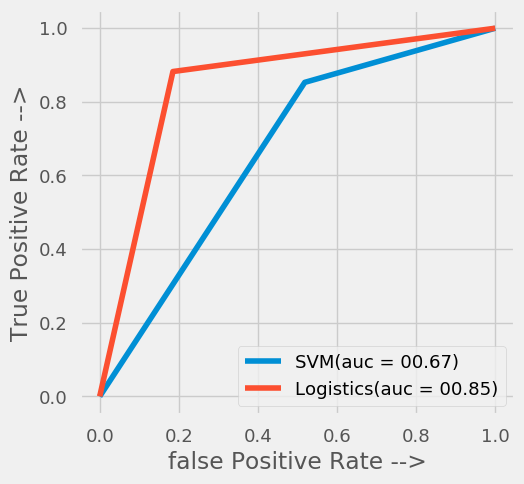

In [131]:
plt.figure(figsize=(5, 5),dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM(auc = 0%.2f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistics(auc = 0%.2f)' % auc_logistic)

plt.xlabel('false Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

From the above curve it is seen that Logistic regression shows to be a better model than SVM

<h1>Conclusion</h1>
<p>Heart Disease is one of the major concerns for society today.
It is difficult to manually determine the odds of getting heart disease based on risk factors. However, machine learning techniques are useful to predict the output from existing data. Having checked the contributing risk factors and applying machine learning techniques, one can conclude that too much and too little of every thing can lead to serious heart diseases so it is therefore advised that we carry monthly check-ups and maintain a balanced/moderate healthy lifestyle. 